<center><h1>Universidad Politecnica Salesiana</h1></center>
<center><h2>Simulacion</h2></center>
<center><h3>Prueba de Numero PseudoAleatorios</h3></center>

Objetivo:

- Consolidar los conocimientos adquiridos generación de números pseudoaleatorios.

Introducción:

Es fundamental verificar la calidad de los números  pseudoaleatorios. Ademas es importante no olvidar las 2 propiedades más importantes que deben tener los números pseudoaleatorios: uniformidad e independencia.

La uniformidad se puede verificar usando las pruebas de bondad de ajuste test Chi Cuadrada

Chi-Cuadrada

Esta prueba verifica la desviación del valor esperado y  se usa cuando se trabaja con variables nominales (categorías o grupos)
Debemos responder a la pregunta: ¿Difieren las frecuencias observadas de la frecuencia esperada?


<h1>Desarrollo de la prueba</h1>

Pasos para aplicar la prueba:

- Vamos a importar todas las liberiras que vasmoa a utilizar para desarrolar la prueba 

In [19]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

<h1>Congruencia Lineal</h1>
Un generador lineal congruencial (GLC) es un algoritmo que permite obtener una secuencia de números pseudoaleatorios calculados con una función lineal definida a trozos discontinua. Es uno de los métodos más antiguos y conocidos para la generación de números pseudoaleatorios

In [20]:
def congrueL(x, a, c, mod, it):
    aux = 0.00
    lis =[]
    for i in range(it):
        x = (a * x + c) % mod
        aux = round(x/mod,2)
        lis.append(aux)
    return lis

Vamos a optener lso datos que  se van a a necesitar para el desarrollo

In [27]:
def gP(d):
    aux1 =0
    aux2 =0
    if d%2 !=0:
        aux1 = int(d/2)
        aux2 = int(d/2)+1
    else:
        aux1 = int(d/2)
        aux2 = aux1
    return aux1,aux2

<h1>Método de los Cuadrados Medios</h1>
Es un método propuesto en los años 40 por los matemáticos John von Neumann y Nicholas Metropolis, siendo utilizado para la generación de números pseudoaleatorios, Esto para obtener una sucesión de números que básicamente se obtienen a partir de recurrencia, los cuales son relevantes en los procesos de simulación debido a que con estos números se hace posible comprobar el correcto funcionamiento de una prueba mediante la observación del comportamiento de las variables que se puedan encontrar a lo largo de la simulación.

In [28]:
def cudMedios(it, v, d):
    lis =[]
    semilla = int(v)
    aux = gP(d)
    for i in range(it):
        x= semilla**2
        l= len(str(x))
        u= str(x)[int(l/2)-aux[0]:int(l/2)+aux[1]]
        r= round(int(i)/10**d,2)
       
        lis.append(r)
        semilla=int(u)
   
    return lis

In [33]:
def lisDict(ngr, au, lis):
    gr = []
    aux=0.00
    for i in range(ngr+1):
        gr.append(round(aux,2))
        aux=aux+au
    a=0
    b=1
    ran={}
    for i in range(len(gr)-1):
        f=gr[a]
        s=gr[b]
        ran.update({str(f)+"," +str(s):[]})
        for i in lis:
            if i==0.00:
                if i >=f and i <=s:
                    ran[str(f)+","+str(s)].append(i)
            else:
                if i >f and i <=s:
                    ran[str(f)+","+str(s)].append(i)
        a=b
        b=a+1
    return ran

<h1>Chi Cuadrado</h1>
La prueba chi-cuadrado utiliza una aproximación a la distribución chi cuadrado para evaluar la probabilidad de una discrepancia igual o mayor que la que exista entre los datos y las frecuencias esperadas según la hipótesis nula.

La exactitud de dicha evaluación dependerá de que los valores esperados no sean muy pequeños, y en menor medida de que el contraste entre ellos no sea muy elevado.

In [34]:
def chiCuadrado(lis, v):
    num = int(mt.sqrt(len(lis)))
    d = lisDict(num,1/num, lis)
    s = 0.00
    print(" Intervalo ", "    Ei ", "   Oi ", " (Oi-Ei)**2/Ei")
    for x, it in enumerate(d.items()):
        f = ((len(it[1])-num)**2)/num
        s+=f
        print(x, " ", str(num)+"("+it[0]+")  ", len(it[1]),"  ", f)

    plt.hist(lis)
    plt.ylabel('Frequencia')
    plt.xlabel('valores')
    plt.title('Histograma Chi cuadrado')
    plt.show()
    
    print("Valor de la Suma : ",s)
    if s< v:
        return True
    else:
        return False


<h1>Prueba del Chi Cuadrado</h1>
La prueba chi-cuadrado, también llamada Ji cuadrado (Χ2), se encuentra dentro de las pruebas pertenecientes a la estadística descriptiva, concretamente la estadística descriptiva aplicada al estudio de dos variables. Por su parte, la estadística descriptiva se centra en extraer información sobre la muestra. En cambio, la estadística inferencial extrae información sobre la población.

El nombre de la prueba es propio de la distribución Chi-cuadrado de la probabilidad en la que se basa. Esta prueba fue desarrollada en el año 1900 por Karl Pearson.

In [35]:
def main():
    valor = 16.9
    print("Parte 1 CM")
    iters = 100
    digs = 7
    lista = cudMedios(iters, 13747323189, digs)
    res=chiCuadrado(lista,valor)
    print("Pasa: ",res) 
    
    print("")
    print("Parte 2 CL")

    lista2 = congrueL(6,847334897457,13747323189,12,iters)
    res2 = chiCuadrado(lista2,valor)
    print("Pasa: ",res2)

Parte 1 CM
 Intervalo      Ei     Oi   (Oi-Ei)**2/Ei
0   10(0.0,0.1)   100    810.0
1   10(0.1,0.2)   0    10.0
2   10(0.2,0.3)   0    10.0
3   10(0.3,0.4)   0    10.0
4   10(0.4,0.5)   0    10.0
5   10(0.5,0.6)   0    10.0
6   10(0.6,0.7)   0    10.0
7   10(0.7,0.8)   0    10.0
8   10(0.8,0.9)   0    10.0
9   10(0.9,1.0)   0    10.0


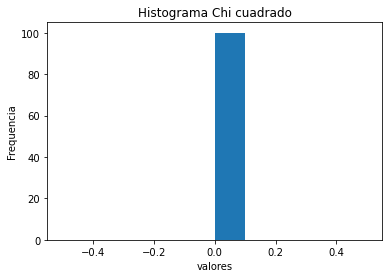

Valor de la Suma :  900.0
Pasa:  False

Parte 2 CL
 Intervalo      Ei     Oi   (Oi-Ei)**2/Ei
0   10(0.0,0.1)   25    22.5
1   10(0.1,0.2)   0    10.0
2   10(0.2,0.3)   25    22.5
3   10(0.3,0.4)   0    10.0
4   10(0.4,0.5)   25    22.5
5   10(0.5,0.6)   0    10.0
6   10(0.6,0.7)   0    10.0
7   10(0.7,0.8)   25    22.5
8   10(0.8,0.9)   0    10.0
9   10(0.9,1.0)   0    10.0


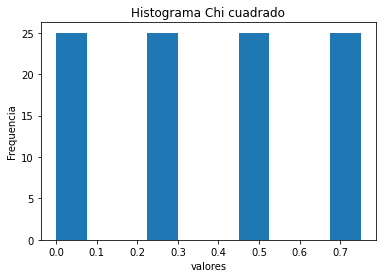

Valor de la Suma :  150.0
Pasa:  False


In [36]:
if __name__ == "__main__":
    main()

<h1>Conclusion</h1>
Como podemos  ver  la prueba se a dearrollado con el metodo de cuadrados medios que es siendo utilizado para la generación de números pseudoaleatorios, Esto para obtener una sucesión de números que básicamente se obtienen a partir de recurrencia lo cual, vemos  ver que  valores se le pasa para tener una valor eficiente

<h1>Bibliogracias</h1>
[1] : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/

[2] : https://www.mdirector.com/marketing-automation/estrategias-de-marketing-automation-para-fidelizar.html

[3] : https://blog.inconcertcc.com/automatiza-el-marketing-digital-en-tus-redes-sociales/

[4] : https://psicologiaymente.com/miscelanea/prueba-chi-cuadrado

[5] : https://es.wikibooks.org/wiki/M%C3%A9todo_de_los_cuadrados_medios_para_la_generaci%C3%B3n_de_n%C3%BAmeros_pseudoaleatorios
